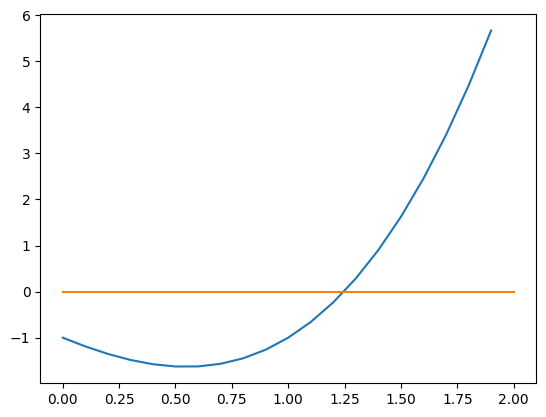

Простой метод итерации: (1.2469747604973989, 5)
Решение: (1.2469747604973989, 5)
Метод Ньютона: (1.246979603722876, 5)
Решение: (1.246979603722876, 5)


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 + x**2 - 2*x - 1

def f_der(x):
    return 3*x**2 + 2*x - 2

def f_der2(x):
    return 6*x + 2

def g(x):
    return (-x**2+2*x+1)**(1/3)

def g_der(x):
    return -(1/3)*((2*x-2)/((-x**2+2*x+1)**(2/3)))

def simple_iteration_method(a,b, tolerance, max_iterations):
    if ((f(a) > 0 and f(b) > 0) or (f(a) < 0 and f(b) < 0)):
        raise ValueError("Нет решения!")
    iteration = 0

    if (abs(g_der(a)) >= 1) or (abs(g_der(b)) >= 1):
        raise ValueError("Нет решения!")

    x=(a+b)/2

    while iteration < max_iterations:
        x_new = g(x)
        if abs(x_new - x) < tolerance:
            return x_new, iteration + 1
        x = x_new
        iteration += 1

        if abs(g_der(x)) >= 1:
            raise ValueError("Нет решения!")

    raise ValueError("Метод не сошелся после максимального числа итераций")

def newton_method(a, b, tolerance):
    if ((f(a) > 0 and f(b) > 0) or (f(a) < 0 and f(b) < 0)):
        raise ValueError("Нет решения!")

    if (f(a)*f_der2(a) <= 0) and (f(b)*f_der2(b) <= 0):
        raise ValueError("Нет решения!")

    if (f(a)*f_der2(a) <= 0):
        x = b
    else:
        x = a

    iterations = 0

    while True:

        x_new = x - f(x) / f_der(x)
        iterations += 1

        if abs(x_new - x) < tolerance:
            return x_new, iterations

        x = x_new

def drawplot():
    x = [0,2]
    y = [0,0]
    x1 = np.arange(0,2,0.1)
    y1 = f(x1)
    plt.plot(x1,y1,x,y)
    plt.show()

a_value = 4
epsilon_value = 0.01
max_iterations_value = 1000
a = 1
b = 2
tolerance = 0.001
a1 = 1.0
b1 = 3.0
a2 = 0.0
b2 = 4.0

drawplot()

result_simple_iteration = simple_iteration_method(a, b, 0.0001, 1000)
print("Простой метод итерации:", result_simple_iteration)
print("Решение:", result_simple_iteration[0:2])
result_newton_method = newton_method(a, b, 0.0001)
print("Метод Ньютона:", result_newton_method)
print("Решение:",result_newton_method[0:2])

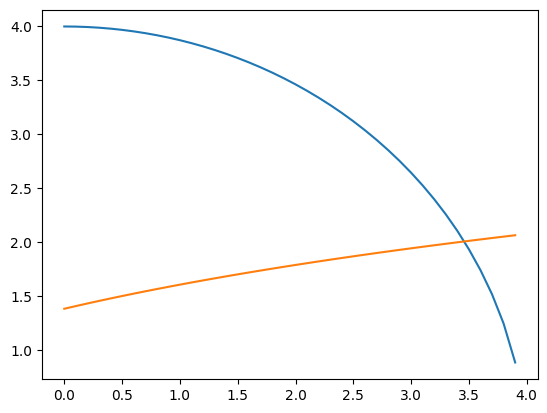

Метод простой итерации:
Решение: (np.float64(3.4586681639523387), np.float64(2.009472622649738))
Количество итераций: 7
Метод Ньютона:
Решение: (np.float64(3.458670731045493), np.float64(2.009377212458886))
Количество итераций: 4


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def f1(x1, x2, a):
    return x1**2 + x2**2 - a**2

def f2(x1, x2, a):
    return x1 - math.exp(x2) + a

def df1_dx1(x1, x2, a):
    return 2 * x1

def df1_dx2(x1, x2, a):
    return 2 * x2

def df2_dx1(x1, x2, a):
    return 1

def df2_dx2(x1, x2, a):
    return -np.exp(x2)

def nextx1(x2, a):
    return (-x2**2 + a**2)**(1/2)

def nextx2(x1,a):
    return np.log(x1+a)

def simple_iteration_method_multiple(a1, b1, a2, b2, a, tolerance, max_iterations):

    x1 = (a1+b1)/2
    x2 = (a2+b2)/2

    errors = []  # хранение погрешностей на каждой итерации

    for i in range(max_iterations):
        x1_new = nextx1(x2,a)
        x2_new = nextx2(x1,a)

        error = max(abs(x1_new - x1), abs(x2_new - x2))
        errors.append(error)

        if error < tolerance:
            return x1_new, x2_new, i+1, errors

        x1, x2 = x1_new, x2_new

    return None, None, max_iterations, errors

def newton_method_multiple(a1, b1, a2, b2, a, tolerance, max_iterations):

    x1 = (a1+b1)/2
    x2 = (a2+b2)/2

    errors = []  # для хранения погрешностей на каждой итерации

    for i in range(max_iterations):
        det = df1_dx1(x1, x2, a) * df2_dx2(x1, x2, a) - df1_dx2(x1, x2, a) * df2_dx1(x1, x2, a)
        if det == 0:
            return None, None, i+1, errors  # если якобиан равен нулю

        x1_new = x1 - (f1(x1, x2, a) * df2_dx2(x1, x2, a) - f2(x1, x2, a) * df1_dx2(x1, x2, a)) / det
        x2_new = x2 - (f2(x1, x2, a) * df1_dx1(x1, x2, a) - f1(x1, x2, a) * df2_dx1(x1, x2, a)) / det

        error = max(abs(x1_new - x1), abs(x2_new - x2))
        errors.append(error)

        if error < tolerance:
            return x1_new, x2_new, i+1, errors

        x1, x2 = x1_new, x2_new

    return None, None, max_iterations, errors

def drawplot_multi(a):
    x1 = np.arange(0,4,0.1)
    f1 = np.sqrt(a**2-x1**2)
    plt.plot(x1,f1,x1,nextx2(x1,a))
    plt.show()

a_value = 4
epsilon_value = 0.01
max_iterations_value = 1000
a = 1
b = 2
tolerance = 0.001
a1 = 1.0
b1 = 3.0
a2 = 0.0
b2 = 4.0

drawplot_multi(a_value)
result_simple_iteration = simple_iteration_method_multiple(a1, b1, a2, b2, a_value, tolerance, max_iterations_value)
print("Метод простой итерации:")
print("Решение:", result_simple_iteration[0:2])
print("Количество итераций:", result_simple_iteration[2])
result_newton_method = newton_method_multiple(a1, b1, a2, b2, a_value, tolerance, max_iterations_value)
print("Метод Ньютона:")
print("Решение:", result_newton_method[0:2])
print("Количество итераций:", result_newton_method[2])